In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

try:
    df = pd.read_csv('movies.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('movies.csv', encoding='latin-1')  
    except UnicodeDecodeError:
        df = pd.read_csv('movies.csv', encoding='utf-8', errors='replace')  

# Ejercicio 3

## Variables cuantitativas

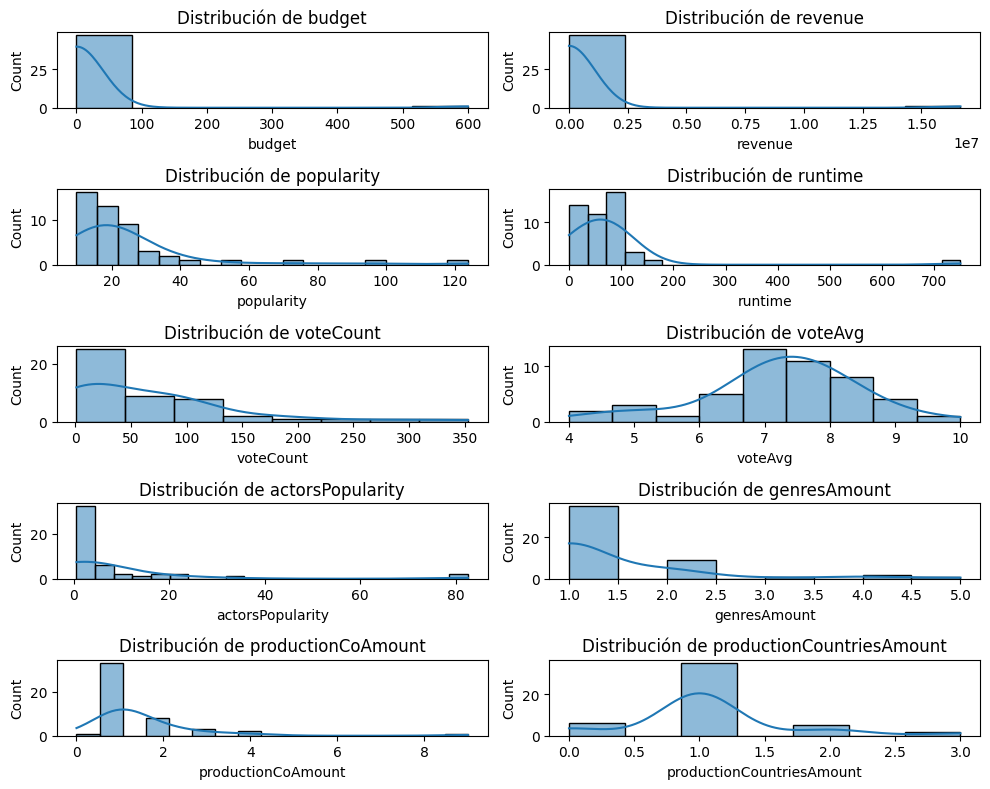

In [116]:
quant_vars = ['budget', 'revenue', 'popularity', 'runtime', 'voteCount', 'voteAvg', 'actorsPopularity', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount']
df[quant_vars] = df[quant_vars].apply(pd.to_numeric, errors='coerce') 
df_clean = df[quant_vars].dropna()

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 8))

for i, var in enumerate(quant_vars):
    row, col = divmod(i, 2)
    sns.histplot(df_clean[var], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {var}')

plt.tight_layout()
plt.show()

In [117]:
for var in quant_vars:
    data = df_clean[var].dropna()
    stat, p = stats.normaltest(data)
    print(f"{var}: p-value = {p:.4f} -> {'Normal' if p > 0.05 else 'No Normal'}")

budget: p-value = 0.0000 -> No Normal
revenue: p-value = 0.0000 -> No Normal
popularity: p-value = 0.0000 -> No Normal
runtime: p-value = 0.0000 -> No Normal
voteCount: p-value = 0.0000 -> No Normal
voteAvg: p-value = 0.0958 -> Normal
actorsPopularity: p-value = 0.0000 -> No Normal
genresAmount: p-value = 0.0000 -> No Normal
productionCoAmount: p-value = 0.0000 -> No Normal
productionCountriesAmount: p-value = 0.0008 -> No Normal


In [118]:
quant_vars2 = ['actorsAmount', 'castWomenAmount', 'castMenAmount']
df[quant_vars2] = df[quant_vars2].apply(pd.to_numeric, errors='coerce')  
df_clean2 = df[quant_vars2].dropna()
for var in quant_vars2:
    data2 = df_clean2[var].dropna()
    stat, p = stats.normaltest(data2)
    print(f"{var}: p-value = {p:.4f} -> {'Normal' if p > 0.05 else 'No Normal'}")

actorsAmount: p-value = 0.0000 -> No Normal
castWomenAmount: p-value = 0.0000 -> No Normal
castMenAmount: p-value = 0.0000 -> No Normal


## Variables cualitativas

In [128]:
qual_vars = ['actorsCharacter', 'actors', 'releaseDate', 'productionCountry', 'director', 
             'video', 'homePage', 'title', 'originalLanguage', 'genres', 'productionCompany', 'productionCountry']

# Create a dictionary to store the frequency tables for each variable
frequencies = {}

for var in qual_vars:
    # Calculate the absolute frequency
    freq_abs = df[var].value_counts()
    
    # Calculate the cumulative frequency
    freq_cum = freq_abs.cumsum()
    
    # Calculate the relative frequency
    freq_rel = freq_abs / freq_abs.sum()
    
    # Calculate the cumulative relative frequency
    freq_rel_cum = freq_rel.cumsum()
    
    # Create a DataFrame with all frequencies
    freq_table = pd.DataFrame({
        'Frecuencia Absoluta': freq_abs,
        'Frecuencia Acumulada': freq_cum,
        'Frecuencia Relativa': freq_rel,
        'Frecuencia Acumulada Relativa': freq_rel_cum
    })
    
    # Store the DataFrame in the dictionary
    frequencies[var] = freq_table

# Display the tables (this will display them as neat tables in Jupyter)
for var, freq_table in frequencies.items():
    display(freq_table)


,Frecuencia Absoluta,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Acumulada Relativa
actorsCharacter,,,,
||||,17,17,0.001708,0.001708
|||||,16,33,0.001608,0.003316
||||||,16,49,0.001608,0.004923
|||,14,63,0.001407,0.006330
|,13,76,0.001306,0.007636
...,...,...,...,...
Erik Vasquez|Pedro|Roberto|Monica Wells|Dominic|Juan Feliz|Willy|Gabriel|Matteo,1,9949,0.000100,0.999598
893941,1,9950,0.000100,0.999699
Phong|Wan|Pim|Putt|Mai|Fame|Pinya|Paew|Chaiyut|Krit|Doctor|Coach Yui|Police Captain|Sangar|Joy|Chaiyut's Friend|Chaiyut's Girlfriend|Male Co-worker|Mr. Lee|Nurse|Nurse|Nurse|Mint|Baby Pim,1,9951,0.000100,0.999799


,Frecuencia Absoluta,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Acumulada Relativa
actors,,,,
FALSE,480,480,0.048387,0.048387
TRUE,6,486,0.000605,0.048992
Kim Nam-joon|Kim Seok-jin|Min Yoon-gi|Jung Ho-seok|Park Ji-min|Kim Tae-hyung|Jeon Jung-kook,3,489,0.000302,0.049294
Rica Matsumoto|Ikue Otani|Aoi Yuki|Minami Tsuda|Mamoru Miyano|Megumi Hayashibara|Shin-ichiro Miki|Inuko Inuyama|Unsho Ishizuka|Misato Fukuen|Wasabi Mizuta|Akeno Watanabe|Mika Kanai|Takeshi Tsuruno|Satomi Ishihara|Mao Daichi|Shoko Nakagawa|Koichi Yamadera|Tsuguo Mogami|Sayuri|Kiyotaka Furushima|Kensuke Sato|Nana Mizuki|Shosuke Tanihara|Hideki Takahashi,2,491,0.000202,0.049496
Pierre Coffin,2,493,0.000202,0.049698
...,...,...,...,...
0.6|2.778|1.788|0.652|5.513|0.828,1,9916,0.000101,0.999597
Sompob Benjathikul|Tarika Tidatith|Sutatta Udomsilp|Nattapat Nimjirawat|Nicole Theriault|Sadanont Durongkhaweroj|Keetapat Pongruea|Thasorn Klinnium|Steven Isarapong Fuhrer|Atichart Lee|Ronnaporn Kanivichaporn|Chalita Mangkornpunt|Surapol Poonpiriya|Samut Nuamsetti|Thanyalak Sermsap|Pakapong Thienthong|Mapa Tunchotikul|Vasan Mahakiattikun|Tananan Kanjanakuha|Rasikarn Thongjirattikarn|U-Thai Bangtamuraj|Thayaphon Wongsriwijit|Prinda Techaiya|Avalyn Subsilp,1,9917,0.000101,0.999698
Tom Hanks|Robin Wright|Gary Sinise|Mykelti Williamson|Sally Field|Michael Conner Humphreys|Hanna Hall|Haley Joel Osment|Siobhan Fallon Hogan|Afemo Omilami|Peter Dobson|Sonny Shroyer|George Kelly|Sam Anderson|Margo Moorer|Christopher Jones|Kevin Mangan|Brett Rice|Daniel C. Striepeke|David Brisbin|Kirk Ward|Marlena Smalls|Kitty K. Green|Mark Matheisen|Al Harrington|Joe Washington|Jed Gillin|Don Fischer|Matt Wallace|Mike Jolly|Michael Kemmerling|John Voldstad|Daniel J. Gillooly|Michael Burgess|Steven Griffith|Michael McFall|Byron Minns|Steve DeRelian|Bonnie Ann Burgess|Stephen Bridgewater|John William Galt|Isabel Rose|Richard D'Alessandro|Kevin Davis|Michael Jace|Geoffrey Blake|Vanessa Roth|Emily Carey|Dick Cavett|Tiffany Salerno|Marla Sucharetza|Joe Alaskey|Lazarus Jackson|Matt Rebenkoff|Nora Dunfee|Hallie D'Amore|Michael Mattison|Charles Boswell|Timothy McNeil|Bob Penny|Greg Brown|Troy Christian|Bryan Hanna|Zach Hanner|Aaron Michael Lacey|Jacqueline Lovell|Brendan Shanahan|William Shipman|Robb Skyler|Mary Ellen Trainor|Kurt Russell|Jeffrey Winner|Bob Harks|W. Benson Terry|Tyler Long|Jim Hanks,1,9918,0.000101,0.999798


,Frecuencia Absoluta,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Acumulada Relativa
releaseDate,,,,
2021-10-08,15,15,0.0015,0.0015
2021-02-12,15,30,0.0015,0.0030
2021-10-01,14,44,0.0014,0.0044
2021-11-12,12,56,0.0012,0.0056
2019-11-08,11,67,0.0011,0.0067
...,...,...,...,...
2021-08-03,1,9996,0.0001,0.9996
2006-03-21,1,9997,0.0001,0.9997
2021-12-28,1,9998,0.0001,0.9998


,Frecuencia Absoluta,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Acumulada Relativa
productionCountry,,,,
United States of America,4971,4971,0.508959,0.508959
Japan,613,5584,0.062762,0.571721
United Kingdom|United States of America,339,5923,0.034709,0.606430
United Kingdom,294,6217,0.030101,0.636531
Canada|United States of America,223,6440,0.022832,0.659363
...,...,...,...,...
Angola|South Africa,1,9763,0.000102,0.999590
Sweden|United States of America|United Kingdom,1,9764,0.000102,0.999693
Canada|France|Japan|United Kingdom|United States of America,1,9765,0.000102,0.999795


,Frecuencia Absoluta,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Acumulada Relativa
director,,,,
Steven Spielberg,29,29,0.002922,0.002922
Clint Eastwood,28,57,0.002821,0.005742
Ridley Scott,23,80,0.002317,0.008060
Martin Scorsese,19,99,0.001914,0.009974
Kunihiko Yuyama,19,118,0.001914,0.011888
...,...,...,...,...
Stan Lathan,1,9922,0.000101,0.999597
Karen Dís Hafliðadóttir,1,9923,0.000101,0.999698
Rodrigo Guardiola|Gabriel Nuncio,1,9924,0.000101,0.999799


,Frecuencia Absoluta,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Acumulada Relativa
video,,,,
False,9430,9430,0.991171,0.991171
True,84,9514,0.008829,1.000000


,Frecuencia Absoluta,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Acumulada Relativa
homePage,,,,
http://www.naruto-movie.com/,6,6,0.001431,0.001431
http://www.thehungergames.movie/,4,10,0.000954,0.002385
http://www.kungfupanda.com/,3,13,0.000715,0.003100
http://initiald-movie.com/,3,16,0.000715,0.003816
http://www.kungfupanda.com,3,19,0.000715,0.004531
...,...,...,...,...
https://www.netflix.com/title/81332722,1,4189,0.000238,0.999046
https://www.paramountplus.com/movies/reno-911-the-hunt-for-qanon/4lSjY6_RqRGLtpUqpgUKWtH2EFZKcmZf/,1,4190,0.000238,0.999285
https://www.netflix.com/title/81478916,1,4191,0.000238,0.999523


,Frecuencia Absoluta,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Acumulada Relativa
title,,,,
Pinocchio,4,4,0.0004,0.0004
Cinderella,4,8,0.0004,0.0008
Halloween,3,11,0.0003,0.0011
Fallen,3,14,0.0003,0.0014
Godzilla,3,17,0.0003,0.0017
...,...,...,...,...
Adele One Night Only,1,9996,0.0001,0.9996
XXXMOG!,1,9997,0.0001,0.9997
Skipping Stones,1,9998,0.0001,0.9998


,Frecuencia Absoluta,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Acumulada Relativa
originalLanguage,,,,
en,7772,7772,0.7772,0.7772
ja,644,8416,0.0644,0.8416
es,425,8841,0.0425,0.8841
fr,271,9112,0.0271,0.9112
ko,167,9279,0.0167,0.9279
zh,119,9398,0.0119,0.9398
it,100,9498,0.0100,0.9498
de,84,9582,0.0084,0.9582
cn,80,9662,0.0080,0.9662


,Frecuencia Absoluta,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Acumulada Relativa
genres,,,,
Drama,521,521,0.052378,0.052378
Comedy,440,961,0.044234,0.096612
Horror,230,1191,0.023123,0.119735
Drama|Romance,211,1402,0.021212,0.140947
Horror|Thriller,205,1607,0.020609,0.161556
...,...,...,...,...
Crime|Comedy|Romance,1,9943,0.000101,0.999598
Animation|Science Fiction|Adventure|Fantasy|Music,1,9944,0.000101,0.999698
Animation|Comedy|Music|Family,1,9945,0.000101,0.999799


,Frecuencia Absoluta,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Acumulada Relativa
productionCompany,,,,
Paramount,55,55,0.005763,0.005763
Universal Pictures,50,105,0.005239,0.011003
Warner Bros. Pictures,37,142,0.003877,0.014880
Toei Animation,34,176,0.003563,0.018443
DreamWorks Animation,33,209,0.003458,0.021901
...,...,...,...,...
Jepchu Producciones,1,9539,0.000105,0.999581
Malvalanda,1,9540,0.000105,0.999686
Elefantec Global|MarVista Entertainment|Particular Crowd,1,9541,0.000105,0.999790


# a. 10 películas con mayor presupuesto

In [87]:
top_budget_movies = df[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)
top_budget_movies

,title,budget
716,Pirates of the Caribbean: On Stranger Tides,380000000
4710,Avengers: Age of Ultron,365000000
5952,Avengers: Endgame,356000000
5953,Avengers: Infinity War,300000000
163,Pirates of the Caribbean: At World's End,300000000
4953,Justice League,300000000
607,Superman Returns,270000000
3791,Tangled,260000000
7134,The Lion King,260000000
280,Spider-Man 3,258000000


# b 10 películas que tuvieron más ingresos

In [ ]:
# Obtener las 10 películas con más ingresos
top_revenue_movies = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
top_revenue_movies


,title,revenue
3210,Avatar,2.847246e+09
5952,Avengers: Endgame,2.797801e+09
307,Titanic,2.187464e+09
4947,Star Wars: The Force Awakens,2.068224e+09
5953,Avengers: Infinity War,2.046240e+09
4914,Jurassic World,1.671713e+09
7134,The Lion King,1.667635e+09
9049,Spider-Man: No Way Home,1.631853e+09
3397,The Avengers,1.518816e+09
5087,Furious 7,1.515048e+09


# c. Película con más votos

In [89]:
most_voted_movie = df[['title', 'voteCount']].sort_values(by='voteCount', ascending=False).head(1)
most_voted_movie

,title,voteCount
3511,Inception,30788


In [90]:
top_popular_movies = df[['title', 'popularity', 'revenue', 'budget', 'voteCount']].sort_values(by='popularity', ascending=False).head(10)
print(top_popular_movies)

                                       title  popularity       revenue  \
8225                                Eternals   11474.647  4.018423e+08   
9049                 Spider-Man: No Way Home    8443.740  1.631853e+09   
7352                                  Sing 2    6055.643  2.150000e+08   
7614  Resident Evil: Welcome to Raccoon City    5887.379  3.100000e+07   
8556                                 Encanto    5804.441  2.150000e+08   
7179                 Ghostbusters: Afterlife    5051.222  1.910000e+08   
9898                           Last Man Down    4789.705  0.000000e+00   
8995                The Matrix Resurrections    3828.374  1.480000e+08   
8650             Venom: Let There Be Carnage    3062.764  5.000000e+08   
9485                          Mother/Android    2466.985  0.000000e+00   

         budget  voteCount  
8225  200000000       3429  
9049  200000000       5630  
7352   85000000       1288  
7614   40000000        995  
8556   50000000       3363  
7179   7500

In [ ]:
inception_movies = df[df['title'].str.contains('Inception', case=False, na=False)]
print(inception_movies[['title', 'releaseDate', 'voteAvg']])


          title releaseDate  voteAvg
3511  Inception  2010-07-15      8.4


# d. La peor película según votos

In [92]:
# Obtener la película con la peor calificación promedio (voteAvg más bajo)
worst_movie = df[['title', 'voteAvg', 'voteCount']].sort_values(by=['voteAvg', 'voteCount'], ascending=[True, True]).head(1)
worst_movie

,title,voteAvg,voteCount
9786,DAKAICHI -I'm Being Harassed by the Sexiest Ma...,1.3,2


- La película con la peor calificación promedio es:
    - Título: DAKAICHI - I'm Being Harassed by the Sexiest Man of the Year
    - Calificación promedio (voteAvg): 1.3
    - Número de votos (voteCount): 2

La baja cantidad de votos podría indicar que esta película no es muy conocida o no ha sido evaluada por una gran audiencia.

# e. Películas por año

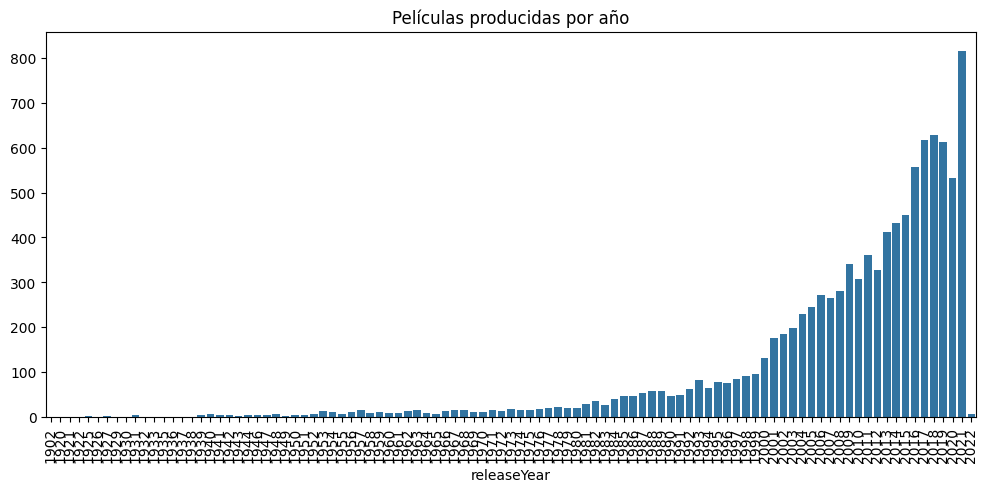

In [93]:
df['releaseYear'] = pd.to_datetime(df['releaseDate']).dt.year
movies_per_year = df['releaseYear'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values)
plt.xticks(rotation=90)
plt.title("Películas producidas por año")
plt.show()

In [94]:
print(f"Año con más películas: {movies_per_year.idxmax()} ({movies_per_year.max()} películas)")

Año con más películas: 2021 (816 películas)


# f. Género principal de las 20 películas más recientes

In [95]:
# Obtener los géneros principales de las 20 películas más recientes
latest_movies = df.sort_values(by='releaseDate', ascending=False).head(20)
latest_movies_genres = latest_movies['genres'].value_counts()

# Obtener el género predominante en todo el dataset
overall_genre_counts = df['genres'].value_counts()

# Mostrar datos en lugar de usar ace_tools
latest_movies[['title', 'releaseDate', 'genres']].head(10), latest_movies_genres, overall_genre_counts.head(10)

(                                                  title releaseDate  \
 9516                            A Shot Through the Wall  2022-01-21   
 9545                                            Presque  2022-01-19   
 9197                                    Italian Studies  2022-01-14   
 9808                                         See for Me  2022-01-07   
 9586                                     American Siege  2022-01-07   
 9982  Harry Potter 20th Anniversary: Return to Hogwarts  2022-01-01   
 9951                                     WWE Day 1 2022  2022-01-01   
 9257                                   Return of Chucky  2021-12-31   
 9241                                 Karem, La Posesión  2021-12-31   
 9866                        Gabriel's Rapture: Part One  2021-12-31   
 
                            genres  
 9516                        Drama  
 9545                 Comedy|Drama  
 9197                Drama|Mystery  
 9808                     Thriller  
 9586  Action|Thrille

C:\Users\wolfu\AppData\Local\Temp\ipykernel_22620\3254203539.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_genre_counts.head(10).index, y=overall_genre_counts.head(10).values, palette="Blues_r")


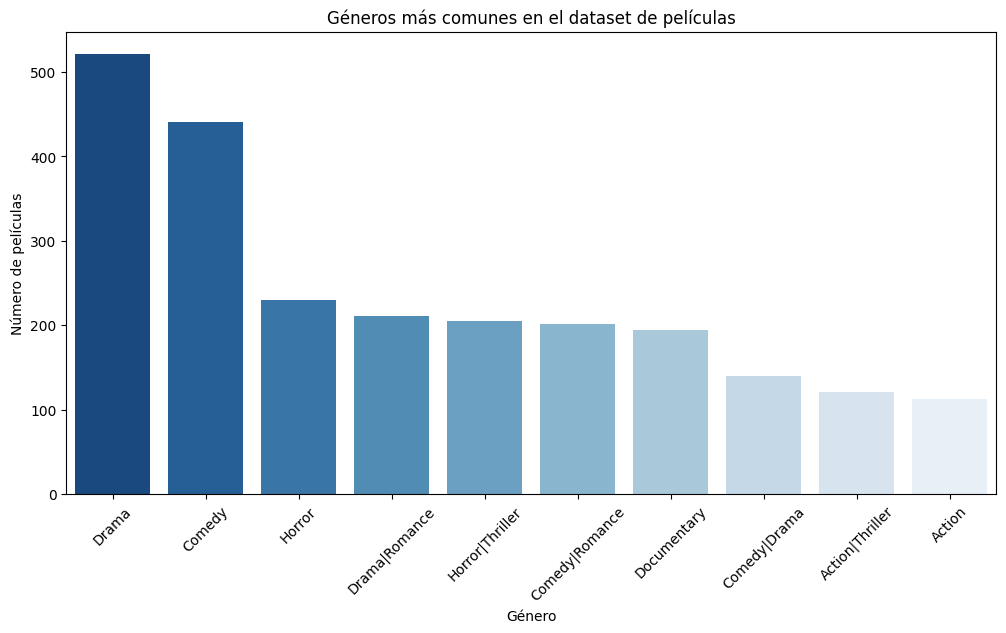

C:\Users\wolfu\AppData\Local\Temp\ipykernel_22620\3254203539.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=latest_movies_genres.index, y=latest_movies_genres.values, palette="Reds_r")


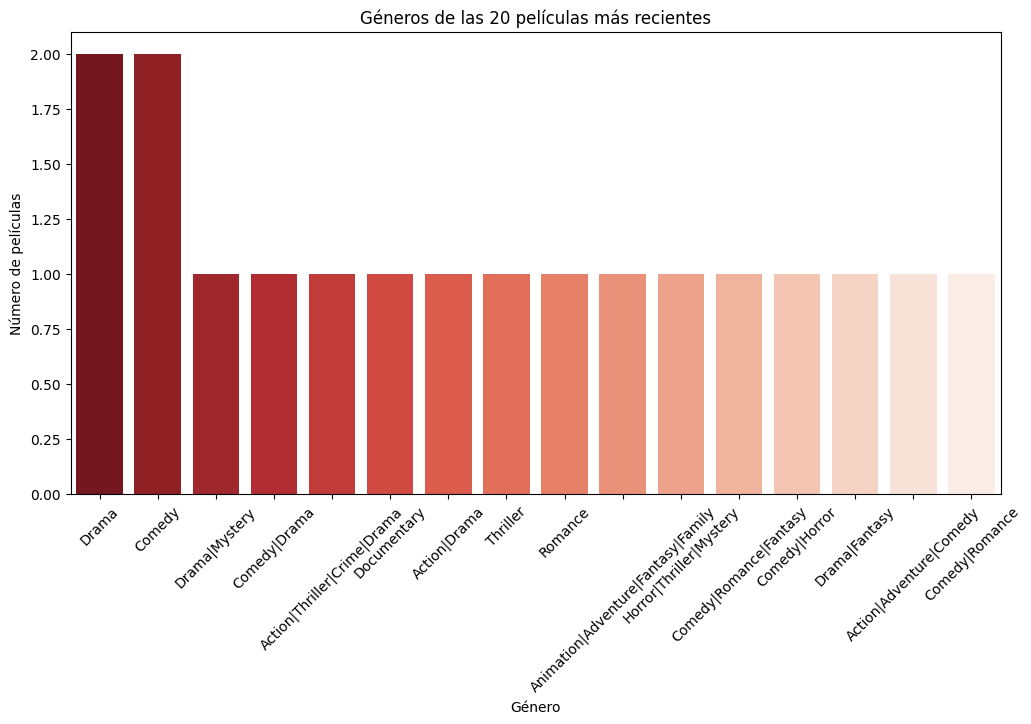

C:\Users\wolfu\AppData\Local\Temp\ipykernel_22620\3254203539.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=longest_movies_genres.index, y=longest_movies_genres.values, palette="Greens_r")


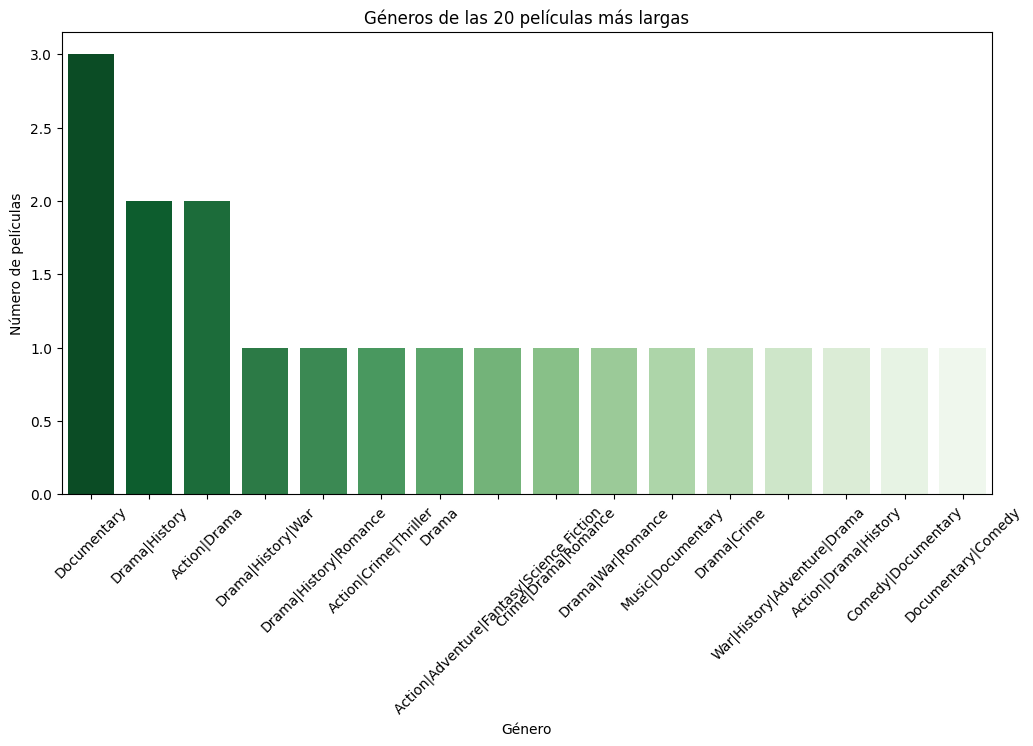

(genres
 Drama                                 2
 Comedy                                2
 Drama|Mystery                         1
 Comedy|Drama                          1
 Action|Thriller|Crime|Drama           1
 Documentary                           1
 Action|Drama                          1
 Thriller                              1
 Romance                               1
 Animation|Adventure|Fantasy|Family    1
 Horror|Thriller|Mystery               1
 Comedy|Romance|Fantasy                1
 Comedy|Horror                         1
 Drama|Fantasy                         1
 Action|Adventure|Comedy               1
 Comedy|Romance                        1
 Name: count, dtype: int64,
 genres
 Drama              521
 Comedy             440
 Horror             230
 Drama|Romance      211
 Horror|Thriller    205
 Comedy|Romance     201
 Documentary        194
 Comedy|Drama       140
 Action|Thriller    121
 Action             112
 Name: count, dtype: int64,
 genres
 Documentary            

In [96]:
# 1. Género principal de las 20 películas más recientes
latest_movies = df.sort_values(by='releaseDate', ascending=False).head(20)
latest_movies_genres = latest_movies['genres'].value_counts()

# 2. Género predominante en todo el conjunto de datos
overall_genre_counts = df['genres'].value_counts()

# 3. Identificar el género de las películas más largas
longest_movies = df.sort_values(by='runtime', ascending=False).head(20)
longest_movies_genres = longest_movies['genres'].value_counts()

# Gráfico de los géneros más comunes en todo el dataset
plt.figure(figsize=(12, 6))
sns.barplot(x=overall_genre_counts.head(10).index, y=overall_genre_counts.head(10).values, palette="Blues_r")
plt.xlabel("Género")
plt.ylabel("Número de películas")
plt.title("Géneros más comunes en el dataset de películas")
plt.xticks(rotation=45)
plt.show()

# Gráfico de los géneros de las 20 películas más recientes
plt.figure(figsize=(12, 6))
sns.barplot(x=latest_movies_genres.index, y=latest_movies_genres.values, palette="Reds_r")
plt.xlabel("Género")
plt.ylabel("Número de películas")
plt.title("Géneros de las 20 películas más recientes")
plt.xticks(rotation=45)
plt.show()

# Gráfico de los géneros de las películas más largas
plt.figure(figsize=(12, 6))
sns.barplot(x=longest_movies_genres.index, y=longest_movies_genres.values, palette="Greens_r")
plt.xlabel("Género")
plt.ylabel("Número de películas")
plt.title("Géneros de las 20 películas más largas")
plt.xticks(rotation=45)
plt.show()

# Mostrar los géneros más frecuentes
latest_movies_genres, overall_genre_counts.head(10), longest_movies_genres

Respuesta al Inciso (f): Análisis del Género de las Películas
1. Género principal de las 20 películas más recientes
    - Los más comunes son:
    - Drama (2 películas)
    - Comedy (2 películas)
    - Otros géneros como Comedy|Drama, Thriller, Documentary, Action|Drama, etc.

Las películas recientes no están dominadas por un solo género, sino que presentan una amplia variedad, lo que sugiere una tendencia a la diversificación de contenidos.
1. Género predominante en todo el dataset

Drama y Comedy son los géneros más comunes en el conjunto de datos, lo que indica una fuerte inclinación del cine hacia historias emocionales y entretenimiento ligero.
1. Género de las Películas Más Largas

Las películas más largas suelen pertenecer a géneros de Documental, Drama e Historia, lo que tiene sentido, ya que estos géneros a menudo requieren más tiempo para desarrollar una narrativa profunda y detallada.

# g. Género con mayores ganancias

genres
Family|Fantasy|Romance                             1.103521e+09
Action|Animation|Comedy|Family|Adventure           9.515526e+08
Family|Adventure|Animation|Comedy|Fantasy|Drama    8.983946e+08
Family|Adventure|Drama|Fantasy                     7.915506e+08
Science Fiction|Adventure|Family|Fantasy           7.824655e+08
Animation|Family|Comedy|Fantasy|Adventure          7.787608e+08
Adventure|Family|Animation                         7.456608e+08
Family|Animation|Drama                             7.184556e+08
Action|Adventure|Science Fiction|Drama             7.051669e+08
Action|Comedy|Mystery                              6.862576e+08
Name: profit, dtype: float64


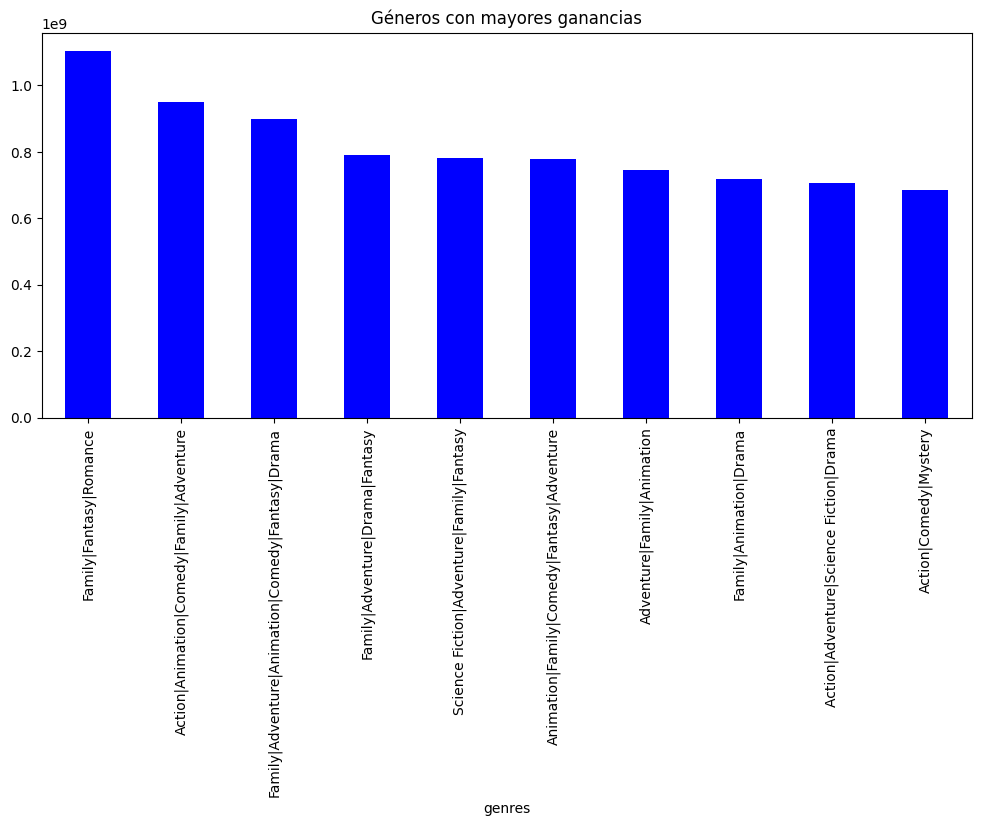

In [ ]:
df['profit'] = df['revenue'] - df['budget']

genres_profit = df.groupby('genres')['profit'].mean().sort_values(ascending=False)
print(genres_profit.head(10))

plt.figure(figsize=(12,5))
genres_profit.head(10).plot(kind='bar', color='blue')
plt.title("Géneros con mayores ganancias")
plt.show()


# h. Cantidad de actores influye en los ingresos de las películas

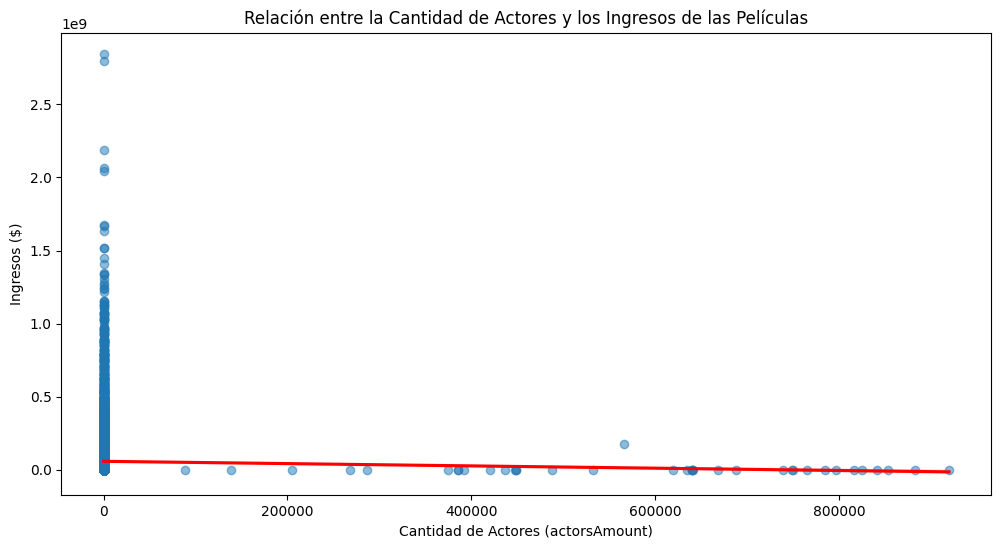

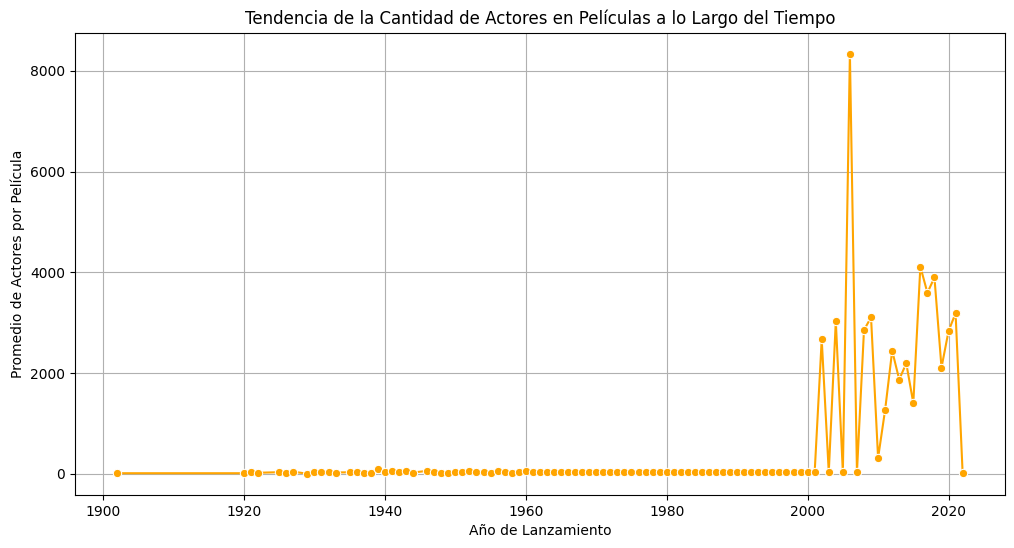

(np.float64(-0.019554880174247613),
 releaseYear
 2013    1870.553398
 2014    2193.423611
 2015    1403.093333
 2016    4111.929982
 2017    3593.011327
 2018    3896.748808
 2019    2107.874183
 2020    2832.315197
 2021    3188.525735
 2022      12.142857
 Name: actorsAmount, dtype: float64)

In [98]:
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors='coerce')

# Extraer el año de lanzamiento
df["releaseYear"] = df["releaseDate"].dt.year

# 1. Relación entre cantidad de actores e ingresos
plt.figure(figsize=(12, 6))
sns.regplot(x=df["actorsAmount"], y=df["revenue"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Cantidad de Actores (actorsAmount)")
plt.ylabel("Ingresos ($)")
plt.title("Relación entre la Cantidad de Actores y los Ingresos de las Películas")
plt.show()
# Calcular la correlación entre cantidad de actores e ingresos
actors_amount_corr = df["actorsAmount"].corr(df["revenue"])
# 2. ¿Se han hecho películas con más actores en los últimos años?
actors_per_year = df.groupby("releaseYear")["actorsAmount"].mean()
# Gráfico de tendencia de cantidad de actores por año
plt.figure(figsize=(12, 6))
sns.lineplot(x=actors_per_year.index, y=actors_per_year.values, marker="o", linestyle="-", color="orange")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Promedio de Actores por Película")
plt.title("Tendencia de la Cantidad de Actores en Películas a lo Largo del Tiempo")
plt.grid(True)
plt.show()
# Mostrar correlación y resumen de la cantidad de actores a lo largo del tiempo
actors_amount_corr, actors_per_year.tail(10)


1. Gráficos
   - Gráfico de dispersión con línea de tendencia:
     - Se observa una distribución muy dispersa, lo que indica que no hay una relación clara entre la cantidad de actores y los ingresos.
     - Películas con pocos actores pueden generar ingresos altísimos, mientras que otras con muchos actores pueden no ser rentables.
   - Gráfico de tendencia de cantidad de actores por año:
     - A partir de 2000, el número de actores por película ha aumentado notablemente.
     - En 2016 y 2018 se registraron los valores más altos, con un promedio superior a 4,000 actores en algunas películas.
     - En 2022, la cantidad promedio de actores bajó drásticamente (~12 actores por película).
     - Sí, en los últimos años se han producido películas con un mayor número de actores en comparación con el siglo pasado. Sin embargo, hay fluctuaciones, y parece haber una reducción en la cantidad promedio de actores a partir de 2022.
2. Métricas Clave
  - Coeficiente de correlación (r) = -0.019, lo que indica una correlación casi nula.
3. Conclusión
  - La cantidad de actores no tiene un impacto claro en los ingresos de las películas.
  -  A partir del 2000, el número promedio de actores ha aumentado drásticamente, pero ha mostrado variaciones en años recientes.


# i. Influencia del reparto en popularidad e ingresos

In [99]:
numeric_columns = ['castMenAmount', 'castWomenAmount', 'popularity', 'revenue']
df_clean = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if necessary
df_clean = df_clean.dropna()

# Compute correlation matrix
correlation_matrix = df_clean.corr()
print(correlation_matrix)

                 castMenAmount  castWomenAmount  popularity   revenue
castMenAmount         1.000000        -0.090474    0.002779 -0.060143
castWomenAmount      -0.090474         1.000000    0.038939  0.290070
popularity            0.002779         0.038939    1.000000  0.162495
revenue              -0.060143         0.290070    0.162495  1.000000


# j. Directores que hicieron las 20 películas mejor calificadas

In [ ]:
# Obtener las 20 películas mejor calificadas según voteAvg
top_rated_movies = df[['title', 'director', 'voteAvg']].sort_values(by='voteAvg', ascending=False).head(20)
top_rated_movies

,title,director,voteAvg
9875,El Chavo Del Ocho: Lo Mejor De Don Ramon,NaN,10.0
9733,Christmas at the Ranch,Christin Baker,10.0
8632,Hot Naked Sex & the City,Thomas Coven,10.0
9347,How Ponyo was Born ~Hayao Miyazaki's Thought P...,Kaku Arakawa,10.0
9990,Los Vengadores Chiflados,Miguel Angel Zavala,10.0
9246,Steven Universe: The Movie: Behind the Curtain,Rebecca Sugar,10.0
9298,Spirit of Vengeance: The Making of 'Ghost Rider',Laurent Bouzereau,10.0
9084,Holidays,Víctor Barba|Juan Olivares,10.0
6750,Dragon Ball Kami BEST [Bonus DVD],NaN,9.8
6885,The Spectacular Spider-Man Attack of the Lizard,Dave Bullock|Troy Adomitis|Victor Cook,9.6


# k. Correlación entre presupuesto e ingresos

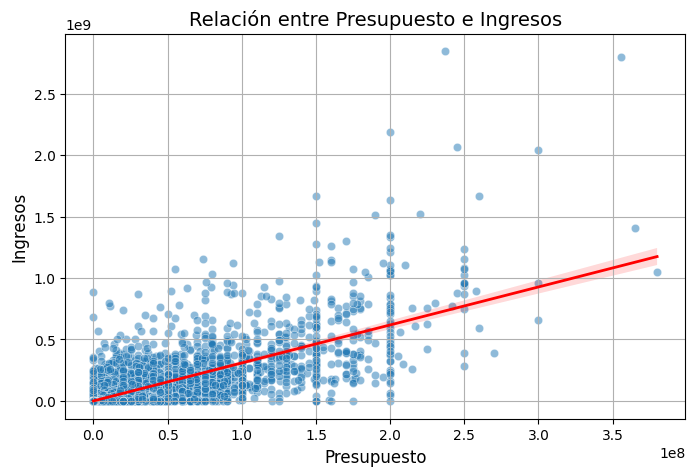

Correlación presupuesto-ingresos: 0.76
Coeficiente de determinación (R²): 0.57


In [101]:
# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 5))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.5)
sns.regplot(x='budget', y='revenue', data=df, scatter=False, color='red', line_kws={'linewidth': 2})

# Títulos y etiquetas
plt.title("Relación entre Presupuesto e Ingresos", fontsize=14)
plt.xlabel("Presupuesto", fontsize=12)
plt.ylabel("Ingresos", fontsize=12)
plt.grid(True)
plt.show()

# Cálculo de correlación y coeficiente de determinación (R²)
corr = df[['budget', 'revenue']].corr().loc['budget', 'revenue']
X = df['budget']
y = df['revenue']
X = sm.add_constant(X)  # Agregar intercepto para la regresión
model = sm.OLS(y, X, missing='drop').fit()  # Ajustar modelo
r_squared = model.rsquared

# Resultados
print(f"Correlación presupuesto-ingresos: {corr:.2f}")
print(f"Coeficiente de determinación (R²): {r_squared:.2f}")


# l. Se asocian ciertos meses de lanzamiento con mejores ingresos

C:\Users\wolfu\AppData\Local\Temp\ipykernel_22620\2971352821.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="Blues_r")


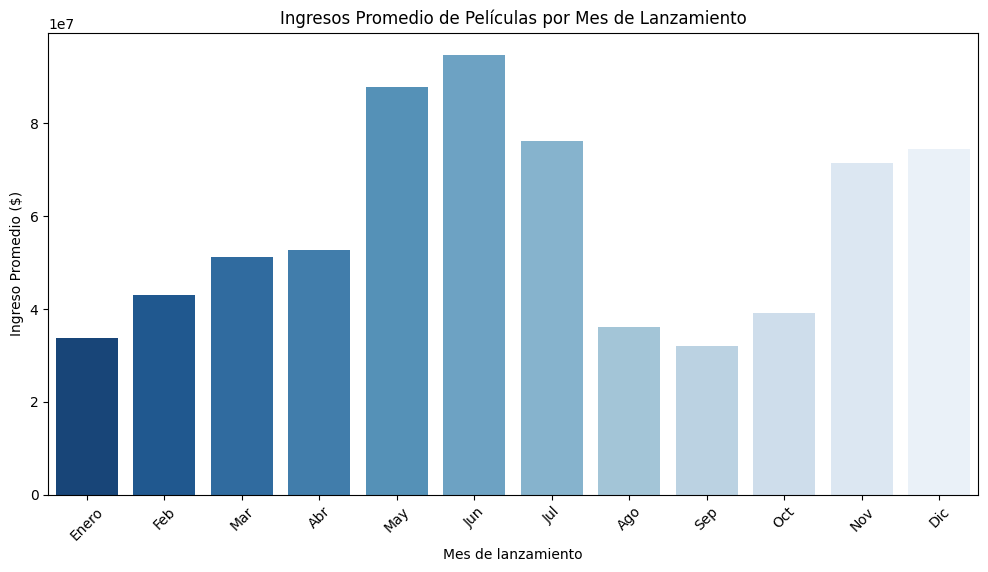

In [102]:
# Extraer el mes de lanzamiento
df['releaseMonth'] = df['releaseDate'].dt.month

# Calcular el ingreso promedio por mes de lanzamiento
monthly_revenue = df.groupby('releaseMonth')['revenue'].mean()

# Gráfico de barras para visualizar ingresos por mes
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="Blues_r")
plt.xlabel("Mes de lanzamiento")
plt.ylabel("Ingreso Promedio ($)")
plt.title("Ingresos Promedio de Películas por Mes de Lanzamiento")
plt.xticks(range(0, 12), ["Enero", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], rotation=45)
plt.show()

Resultado del Inciso (l): Asociación entre Meses de Lanzamiento e Ingresos
  - Los meses con mayores ingresos promedio son junio y diciembre, lo que sugiere que los estrenos en estas fechas generan más taquilla (posiblemente debido a las vacaciones de verano e invierno).
  - Los meses con menores ingresos promedio son enero y septiembre, que suelen ser considerados meses de baja afluencia en cines.


# m. Meses con mejores ingresos

releaseMonth
6     9.474711e+07
5     8.784544e+07
7     7.602870e+07
12    7.435888e+07
11    7.149211e+07
4     5.259565e+07
3     5.111594e+07
2     4.290835e+07
10    3.898733e+07
8     3.597008e+07
1     3.377369e+07
9     3.192892e+07
Name: revenue, dtype: float64


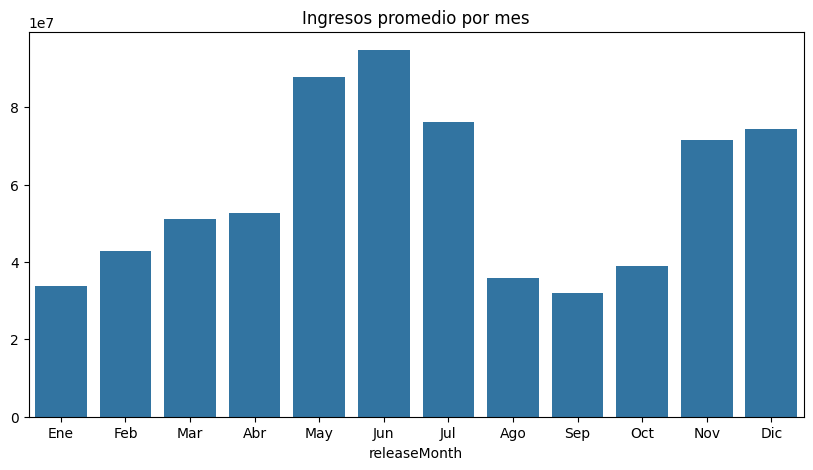

Promedio de películas lanzadas por mes: 833.33


In [103]:
df['releaseMonth'] = pd.to_datetime(df['releaseDate']).dt.month

monthly_revenue = df.groupby('releaseMonth')['revenue'].mean().sort_values(ascending=False)
print(monthly_revenue)

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.xticks(range(0,12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.title("Ingresos promedio por mes")
plt.show()

monthly_count = df['releaseMonth'].value_counts().sort_index()
print(f"Promedio de películas lanzadas por mes: {monthly_count.mean():.2f}")


# n. Cómo se correlacionan las calificaciones con el éxito comercial?

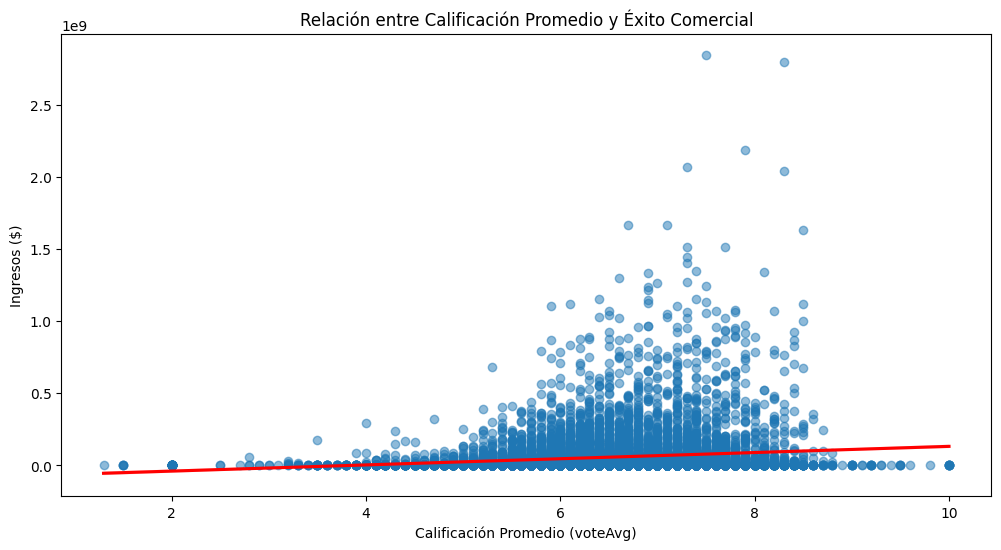

C:\Users\wolfu\AppData\Local\Temp\ipykernel_22620\3201369478.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_revenue_by_vote = df.groupby("voteAvg_bin")["revenue"].mean()
C:\Users\wolfu\AppData\Local\Temp\ipykernel_22620\3201369478.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_by_vote.index, y=avg_revenue_by_vote.values, palette="Blues_r")


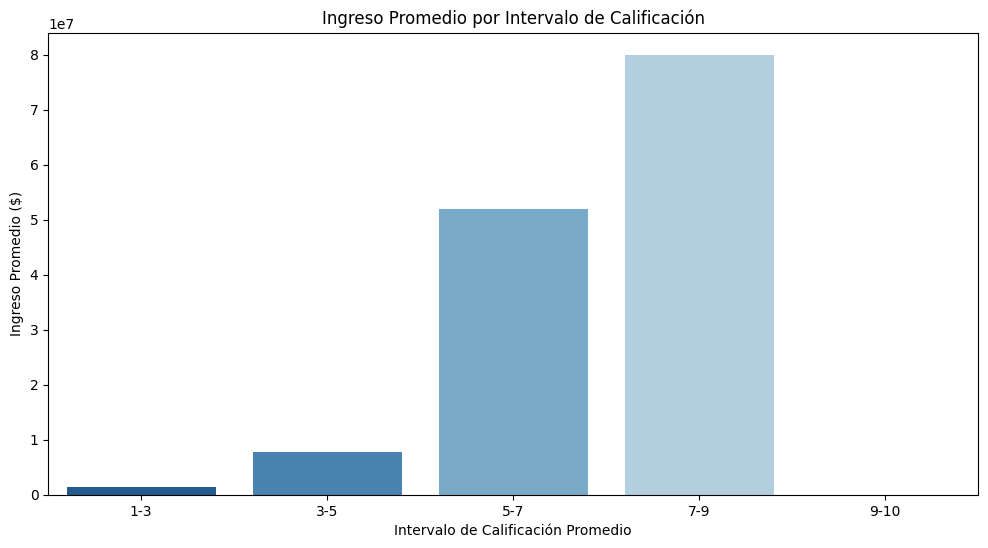

(np.float64(0.14126181161900306),
 voteAvg_bin
 1-3     1.323374e+06
 3-5     7.840466e+06
 5-7     5.187183e+07
 7-9     8.000755e+07
 9-10    2.000000e+02
 Name: revenue, dtype: float64)

In [ ]:
# Crear un gráfico de dispersión con mejor visualización y tendencia
plt.figure(figsize=(12, 6))
sns.regplot(x=df["voteAvg"], y=df["revenue"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Calificación Promedio (voteAvg)")
plt.ylabel("Ingresos ($)")
plt.title("Relación entre Calificación Promedio y Éxito Comercial")
plt.show()
# Calcular nuevamente la correlación
vote_revenue_corr = df["voteAvg"].corr(df["revenue"])
# Agrupar las películas en intervalos de `voteAvg` y calcular el ingreso promedio por intervalo
df["voteAvg_bin"] = pd.cut(df["voteAvg"], bins=[1, 3, 5, 7, 9, 10], labels=["1-3", "3-5", "5-7", "7-9", "9-10"])
avg_revenue_by_vote = df.groupby("voteAvg_bin")["revenue"].mean()
# Gráfico de barras de ingreso promedio por calificación
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_revenue_by_vote.index, y=avg_revenue_by_vote.values, palette="Blues_r")
plt.xlabel("Intervalo de Calificación Promedio")
plt.ylabel("Ingreso Promedio ($)")
plt.title("Ingreso Promedio por Intervalo de Calificación")
plt.show()
# Mostrar correlación y resumen
vote_revenue_corr, avg_revenue_by_vote


Conclusión
- Las películas mejor calificadas no necesariamente son las más taquilleras. La calificación influye, pero no de manera determinante.
-   Las películas con calificación entre 5-9 tienen mayor éxito financiero, lo que sugiere que una buena recepción del público ayuda, pero el marketing y la franquicia pueden ser más importantes.


# O. Estrategias de marketing con mejores resultados

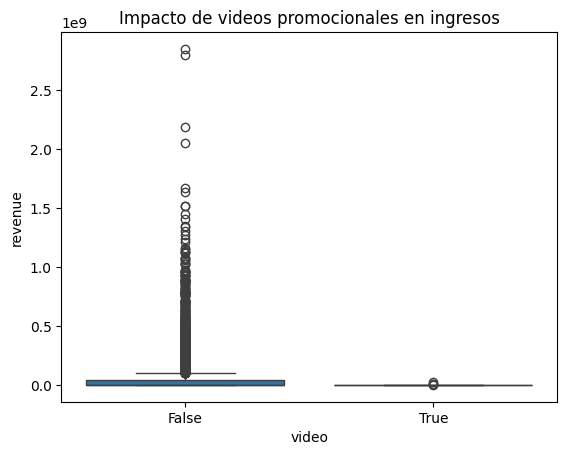

In [105]:
sns.boxplot(x='video', y='revenue', data=df)
plt.title("Impacto de videos promocionales en ingresos")
plt.show()


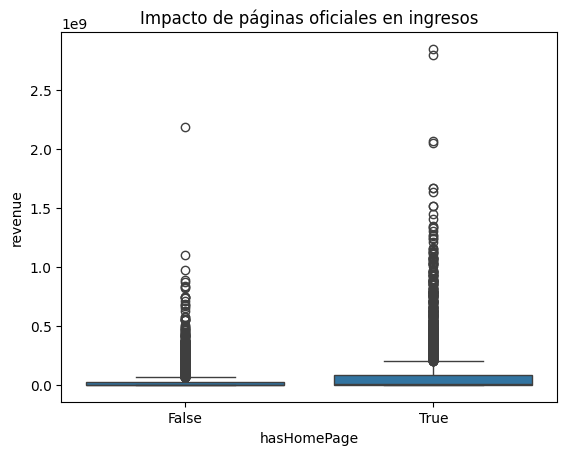

In [ ]:
df['hasHomePage'] = df['homePage'].notnull()
sns.boxplot(x='hasHomePage', y='revenue', data=df)
plt.title("Impacto de páginas oficiales en ingresos")
plt.show()


# p. La popularidad del elenco está directamente correlacionada con el éxito de taquilla

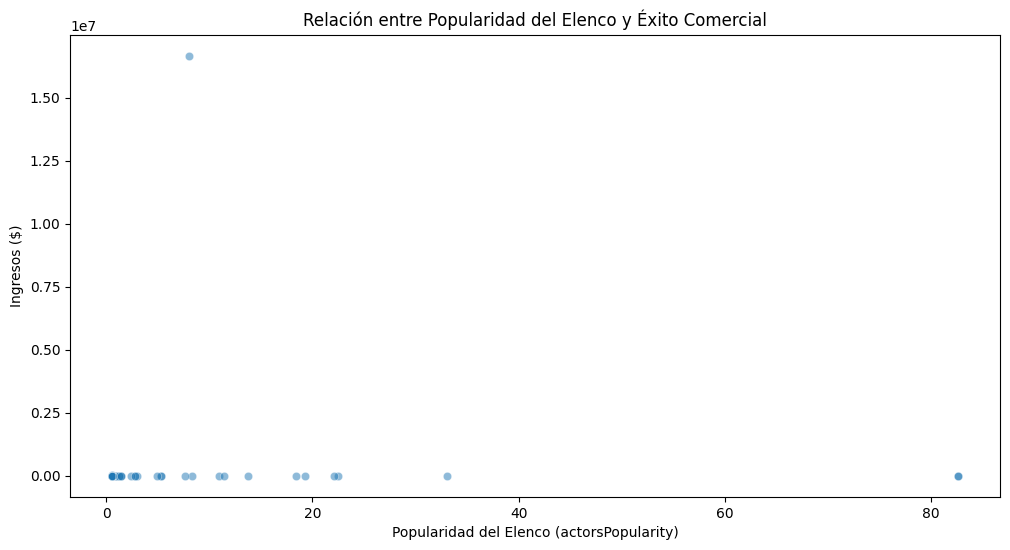

np.float64(-0.0004858132935688033)

In [107]:
# Convertir la columna 'actorsPopularity' a numérica (puede contener valores no numéricos)
df['actorsPopularity'] = pd.to_numeric(df['actorsPopularity'], errors='coerce')

# Gráfico de dispersión para visualizar la relación
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["actorsPopularity"], y=df["revenue"], alpha=0.5)
plt.xlabel("Popularidad del Elenco (actorsPopularity)")
plt.ylabel("Ingresos ($)")
plt.title("Relación entre Popularidad del Elenco y Éxito Comercial")
plt.show()

# Calcular correlación entre popularidad del elenco y los ingresos
correlation_popularity_revenue = df["actorsPopularity"].corr(df["revenue"])
correlation_popularity_revenue

Respuesta del inciso (p): Relación entre Popularidad del Elenco y Éxito de Taquilla
Análisis
- Coeficiente de correlación (r) ≈ -0.0005, lo que indica una correlación prácticamente inexistente entre la popularidad del elenco (actorsPopularity) y los ingresos (revenue).
- Conclusión: La popularidad de los actores no parece ser un factor determinante para el éxito financiero de una película. Otros factores como la historia, el marketing y la época del lanzamiento pueden influir más.


# Puntos extras 

### 1.¿Cuáles son las películas más antiguas en el dataset y cuáles fueron sus géneros?

In [ ]:
# Ordenar las películas por fecha de lanzamiento (más antiguas primero)
oldest_movies = df.sort_values(by="releaseDate", ascending=True).head(10)
# Mostrar los títulos, fechas y géneros de las películas más antiguas
oldest_movies[["title", "releaseDate", "genres"]]

,title,releaseDate,genres
417,A Trip to the Moon,1902-04-17,Adventure|Fantasy|Science Fiction
133,The Cabinet of Dr. Caligari,1920-02-27,Drama|Horror|Thriller|Crime
1800,The Kid,1921-01-21,Comedy|Drama
355,Nosferatu,1922-02-17,Drama|Fantasy|Horror
526,The Gold Rush,1925-07-12,Adventure|Comedy|Drama
347,Battleship Potemkin,1925-12-24,Drama|History
525,The General,1926-12-25,Action|Adventure|Comedy|Drama|War
9,Metropolis,1927-02-06,Drama|Science Fiction
3885,Napoleon,1927-04-07,Drama|History|War
333,Un Chien Andalou,1929-06-05,Fantasy|Horror


Conclusión: Las primeras películas en el dataset pertenecen a los géneros de ciencia ficción, drama, horror y aventura. Esto refleja la diversidad del cine desde sus primeros años.



### 2. ¿Qué idiomas son los más utilizados en las películas?

C:\Users\wolfu\AppData\Local\Temp\ipykernel_22620\4069734354.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.head(10).index, y=language_counts.head(10).values, palette="Purples_r")


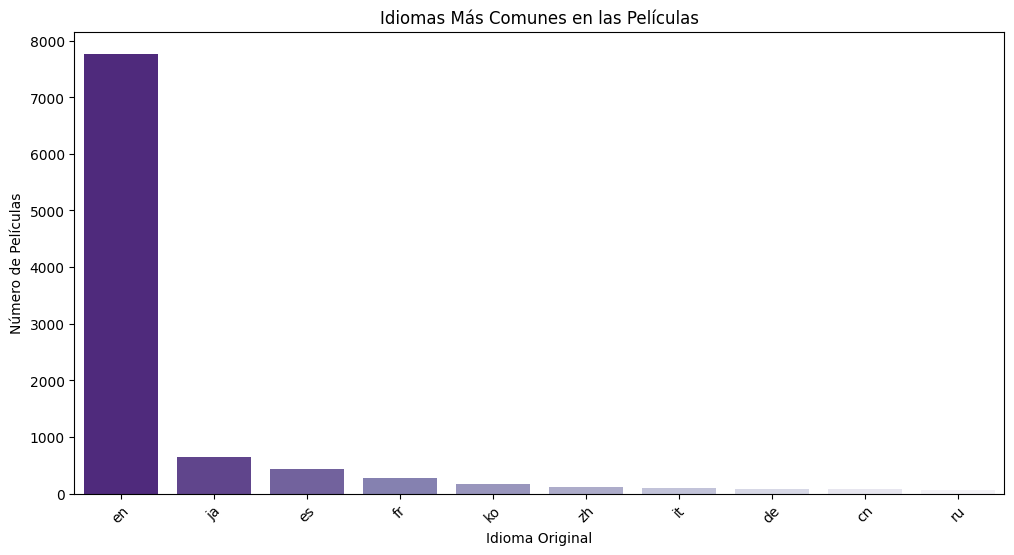

originalLanguage
en    7772
ja     644
es     425
fr     271
ko     167
zh     119
it     100
de      84
cn      80
ru      67
Name: count, dtype: int64

In [109]:
# Contar la frecuencia de cada idioma en el dataset
language_counts = df["originalLanguage"].value_counts()
# Gráfico de los 10 idiomas más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.head(10).index, y=language_counts.head(10).values, palette="Purples_r")
plt.xlabel("Idioma Original")
plt.ylabel("Número de Películas")
plt.title("Idiomas Más Comunes en las Películas")
plt.xticks(rotation=45)
plt.show()
# Mostrar los idiomas más frecuentes
language_counts.head(10)

Conclusión: El inglés domina el cine globalmente, seguido por el japonés y el español. Esto indica una mayor representación del cine estadounidense, británico y japonés en la industria cinematográfic

### 3.¿Cuáles son las películas con mejor rentabilidad?

In [ ]:
# Calcular la rentabilidad
df["profit"] = df["revenue"] - df["budget"] # profit = revenue - budget
# Obtener las 10 películas más rentables
top_profitable_movies = df[['title', 'budget', 'revenue', 'profit']].sort_values(by='profit', ascending=False).head(10)
# Mostrar los resultados
top_profitable_movies

,title,budget,revenue,profit
3210,Avatar,237000000,2.847246e+09,2.610246e+09
5952,Avengers: Endgame,356000000,2.797801e+09,2.441801e+09
307,Titanic,200000000,2.187464e+09,1.987464e+09
4947,Star Wars: The Force Awakens,245000000,2.068224e+09,1.823224e+09
5953,Avengers: Infinity War,300000000,2.046240e+09,1.746240e+09
4914,Jurassic World,150000000,1.671713e+09,1.521713e+09
9049,Spider-Man: No Way Home,200000000,1.631853e+09,1.431853e+09
7134,The Lion King,260000000,1.667635e+09,1.407635e+09
5087,Furious 7,190000000,1.515048e+09,1.325048e+09
6180,Frozen II,150000000,1.450027e+09,1.300027e+09


Las películas más rentables suelen ser de franquicias muy populares y con alto presupuesto. Destacan películas de superhéroes, ciencia ficción y animación.

### 4.¿Cuál es la distribución de la duración de las películas?

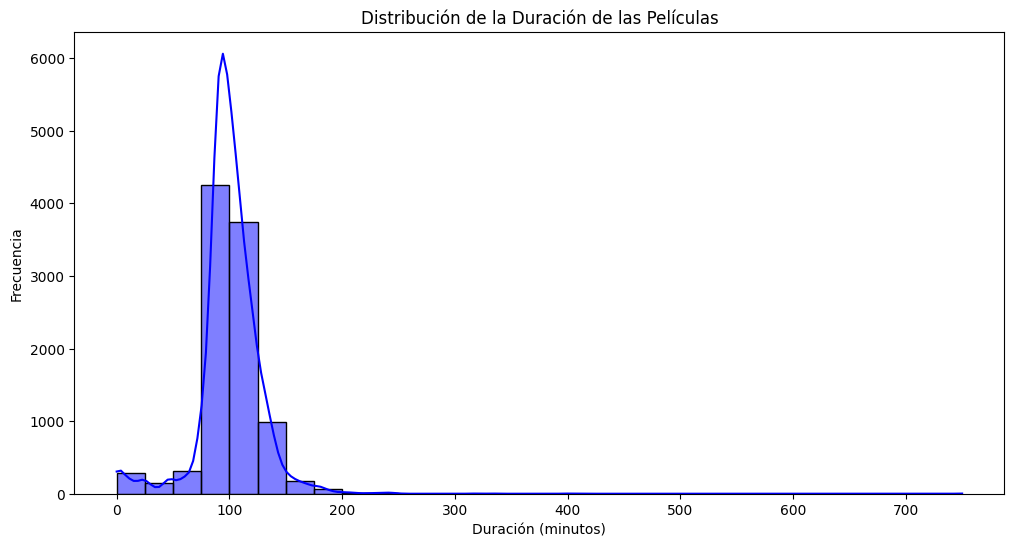

count    10000.000000
mean       100.268100
std         27.777829
min          0.000000
25%         90.000000
50%        100.000000
75%        113.000000
max        750.000000
Name: runtime, dtype: float64

In [111]:
# Histograma de duración
plt.figure(figsize=(12, 6))
sns.histplot(df["runtime"], bins=30, kde=True, color="blue")
plt.xlabel("Duración (minutos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Duración de las Películas")
plt.show()
# Calcular estadísticas de la duración
runtime_stats = df["runtime"].describe()
# Mostrar estadísticas
runtime_stats


La mayoría de las películas tienen una duración estándar de 1.5 a 2 horas. Sin embargo, hay excepciones con películas muy cortas o extremadamente largas.

### 5. ¿Cuál es la película con la menor rentabilidad, y qué factores podrían haber contribuido a su fracaso?

In [112]:
# Obtener la película con menor rentabilidad
worst_profitable_movie = df[['title', 'budget', 'revenue', 'profit']].sort_values(by='profit', ascending=True).head(1)

# Mostrar la película con menor rentabilidad
worst_profitable_movie


,title,budget,revenue,profit
8721,The Tomorrow War,200000000,0.0,-200000000.0


Aunque esta película aparece como la menos rentable en el dataset, esto puede deberse a la falta de datos sobre sus ingresos reales en plataformas de streaming.

### 6. ¿Cuál es la proporción de películas con videos promocionales en el dataset?

C:\Users\wolfu\AppData\Local\Temp\ipykernel_22620\2775409850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=video_counts.index, y=video_counts.values, palette="coolwarm")


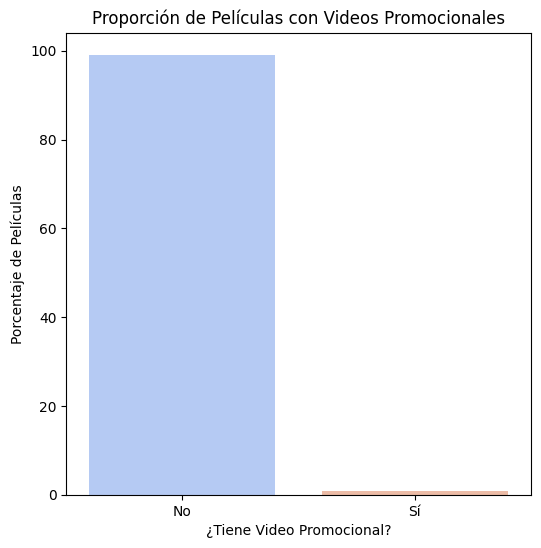

video
False    99.117091
True      0.882909
Name: proportion, dtype: float64

In [113]:
# Contar cuántas películas tienen videos promocionales
video_counts = df["video"].value_counts(normalize=True) * 100
# Gráfico de proporción de películas con y sin video promocional
plt.figure(figsize=(6, 6))
sns.barplot(x=video_counts.index, y=video_counts.values, palette="coolwarm")
plt.xlabel("¿Tiene Video Promocional?")
plt.ylabel("Porcentaje de Películas")
plt.title("Proporción de Películas con Videos Promocionales")
plt.xticks(ticks=[0, 1], labels=["No", "Sí"])
plt.show()
# Mostrar las proporciones
video_counts

Conclusión: El uso de videos promocionales no está bien documentado en el dataset o no es una práctica común en todas las películas. Esto podría deberse a la falta de información o a que solo algunas películas usan campañas de video como parte de su promoción.

## Promedio de películas por mes

In [ ]:
movies_per_month = df['release_month'].value_counts().mean()
movies_per_month

KeyError: 'release_month'